In [7]:
options(repr.plot.width=16, repr.plot.height=9)

In [1]:
library("scPred")
library("Seurat")
library("magrittr")

Attaching SeuratObject

Attaching sp



In [2]:
reference <- scPred::pbmc_1
#query <- scPred::pbmc_2

In [3]:
reference <- reference %>% 
  NormalizeData() %>% 
  FindVariableFeatures() %>% 
  ScaleData() %>% 
  RunPCA() %>% 
  RunUMAP(dims = 1:30)

Centering and scaling data matrix

PC_ 1 
Positive:  MALAT1, RPS12, RPL13, RPS18, RPS4X, LTB, IL32, IL7R, EEF1A1, RPL10 
	   NOSIP, RPS2, CD2, CD7, CCR7, CD27, CD69, MAL, TSHZ2, ITM2A 
	   MYC, TRAT1, CD247, FHIT, GZMM, SH3YL1, TXK, AQP3, TESPA1, PIM1 
Negative:  CST3, FCN1, LYZ, LST1, CSTA, S100A9, SERPINA1, CD68, AIF1, SPI1 
	   CFD, MNDA, S100A8, VCAN, TYROBP, KLF4, CLEC7A, CTSS, PSAP, S100A12 
	   FCER1G, MS4A6A, TYMP, FTL, NCF2, FGL2, CYBB, IFI30, IGSF6, CD14 
PC_ 2 
Positive:  NKG7, CST7, GNLY, GZMA, GZMB, FGFBP2, PRF1, CCL5, B2M, CTSW 
	   KLRD1, GZMH, KLRF1, CCL4, HOPX, SPON2, CLIC3, CMC1, KLRB1, GZMM 
	   FCGR3A, IFITM2, TMSB4X, EFHD2, MATK, ITGB2, MYO1F, PFN1, SRGN, CD247 
Negative:  RPL13, RPS12, RPS18, LTB, RPS2, EEF1A1, RPL10, RPLP1, RPS4X, TPT1 
	   MS4A1, CD79A, HLA-DRA, BANK1, MEF2C, LINC00926, HLA-DQB1, HLA-DQA1, VPREB3, CD79B 
	   NCF1, IL7R, CCR7, BIRC3, TNFRSF13C, MARCH1, RALGPS2, TCL1A, HLA-DMB, CD22 
PC_ 3 
Positive:  CD79A, MS4A1, CD79B, HLA-DQA1, CD74, BANK1, HL

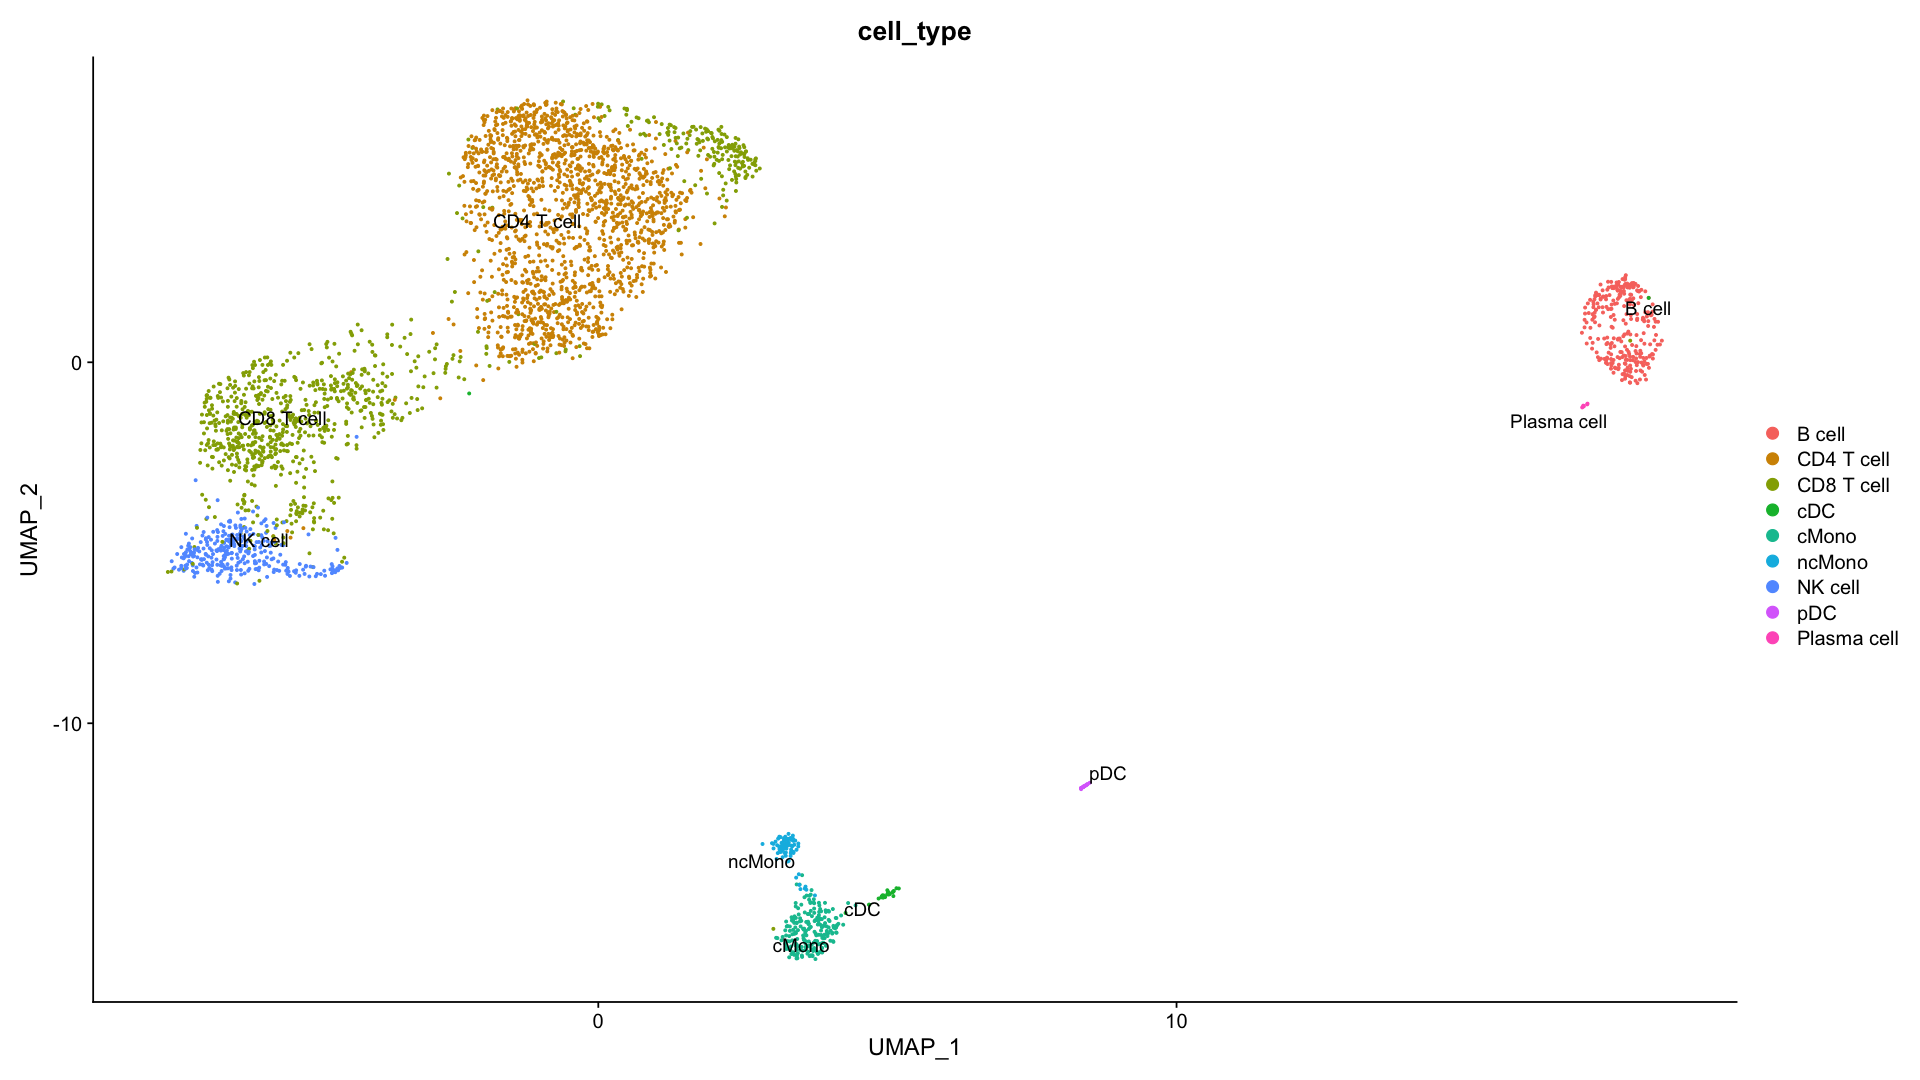

In [8]:
DimPlot(reference, group.by = "cell_type", label = TRUE, repel = TRUE)

In [9]:
reference <- getFeatureSpace(reference, "cell_type")

●  Extracting feature space for each cell type...
DONE!


In [10]:
reference <- trainModel(reference)

●  Training models for each cell type...


Loading required package: ggplot2

Loading required package: lattice



maximum number of iterations reached 0.0001163544 -0.0001154305DONE!


In [11]:
get_probabilities(reference) %>% head()

,CD8 T cell,CD4 T cell,cMono,B cell,NK cell,pDC,ncMono,cDC,Plasma cell
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CCACGGACATGCTGGC-1,0.99997400,3.986948e-06,3.429930e-05,1.895677e-04,3.086312e-06,1.838937e-05,9.126555e-10,8.811149e-05,0.0004788954
GATTCAGGTCTCCACT-1,0.04042862,9.889574e-01,1.067423e-06,4.731890e-05,1.172672e-05,5.054285e-06,1.752136e-08,3.084253e-06,0.0003292191
TGTATTCTCTATGTGG-1,0.03911453,7.548134e-03,7.249458e-01,1.130582e-02,8.314200e-03,2.649234e-02,2.539761e-01,4.782914e-02,0.0030142849
GTCTCGTGTTCACGGC-1,0.03818003,5.260064e-03,6.232676e-02,8.985316e-01,9.004368e-03,5.195012e-03,4.323785e-03,6.153321e-03,0.0019860613
TATCAGGCACCAACCG-1,0.99975425,2.711294e-06,6.725367e-06,3.310682e-05,4.771576e-04,1.677773e-05,4.027229e-09,2.176531e-05,0.0004192118
TTTGCGCAGTAAGTAC-1,0.00813470,9.933063e-01,1.465473e-07,8.092728e-05,2.445414e-04,4.071722e-06,2.025713e-12,4.537904e-08,0.0001529051


In [12]:
get_scpred(reference)

'scPred' object
✔  Prediction variable = cell_type 
✔  Discriminant features per cell type
✔  Training model(s)
Summary

|Cell type   |    n| Features|Method    |   ROC|  Sens|  Spec|
|:-----------|----:|--------:|:---------|-----:|-----:|-----:|
|B cell      |  280|       50|svmRadial | 1.000| 0.964| 1.000|
|CD4 T cell  | 1620|       50|svmRadial | 0.997| 0.971| 0.975|
|CD8 T cell  |  945|       50|svmRadial | 0.985| 0.902| 0.978|
|cDC         |   26|       50|svmRadial | 0.995| 0.547| 1.000|
|cMono       |  212|       50|svmRadial | 0.994| 0.958| 0.970|
|ncMono      |   79|       50|svmRadial | 0.998| 0.570| 1.000|
|NK cell     |  312|       50|svmRadial | 0.999| 0.936| 0.996|
|pDC         |   20|       50|svmRadial | 1.000| 0.700| 1.000|
|Plasma cell |    6|       50|svmRadial | 1.000| 0.800| 1.000|

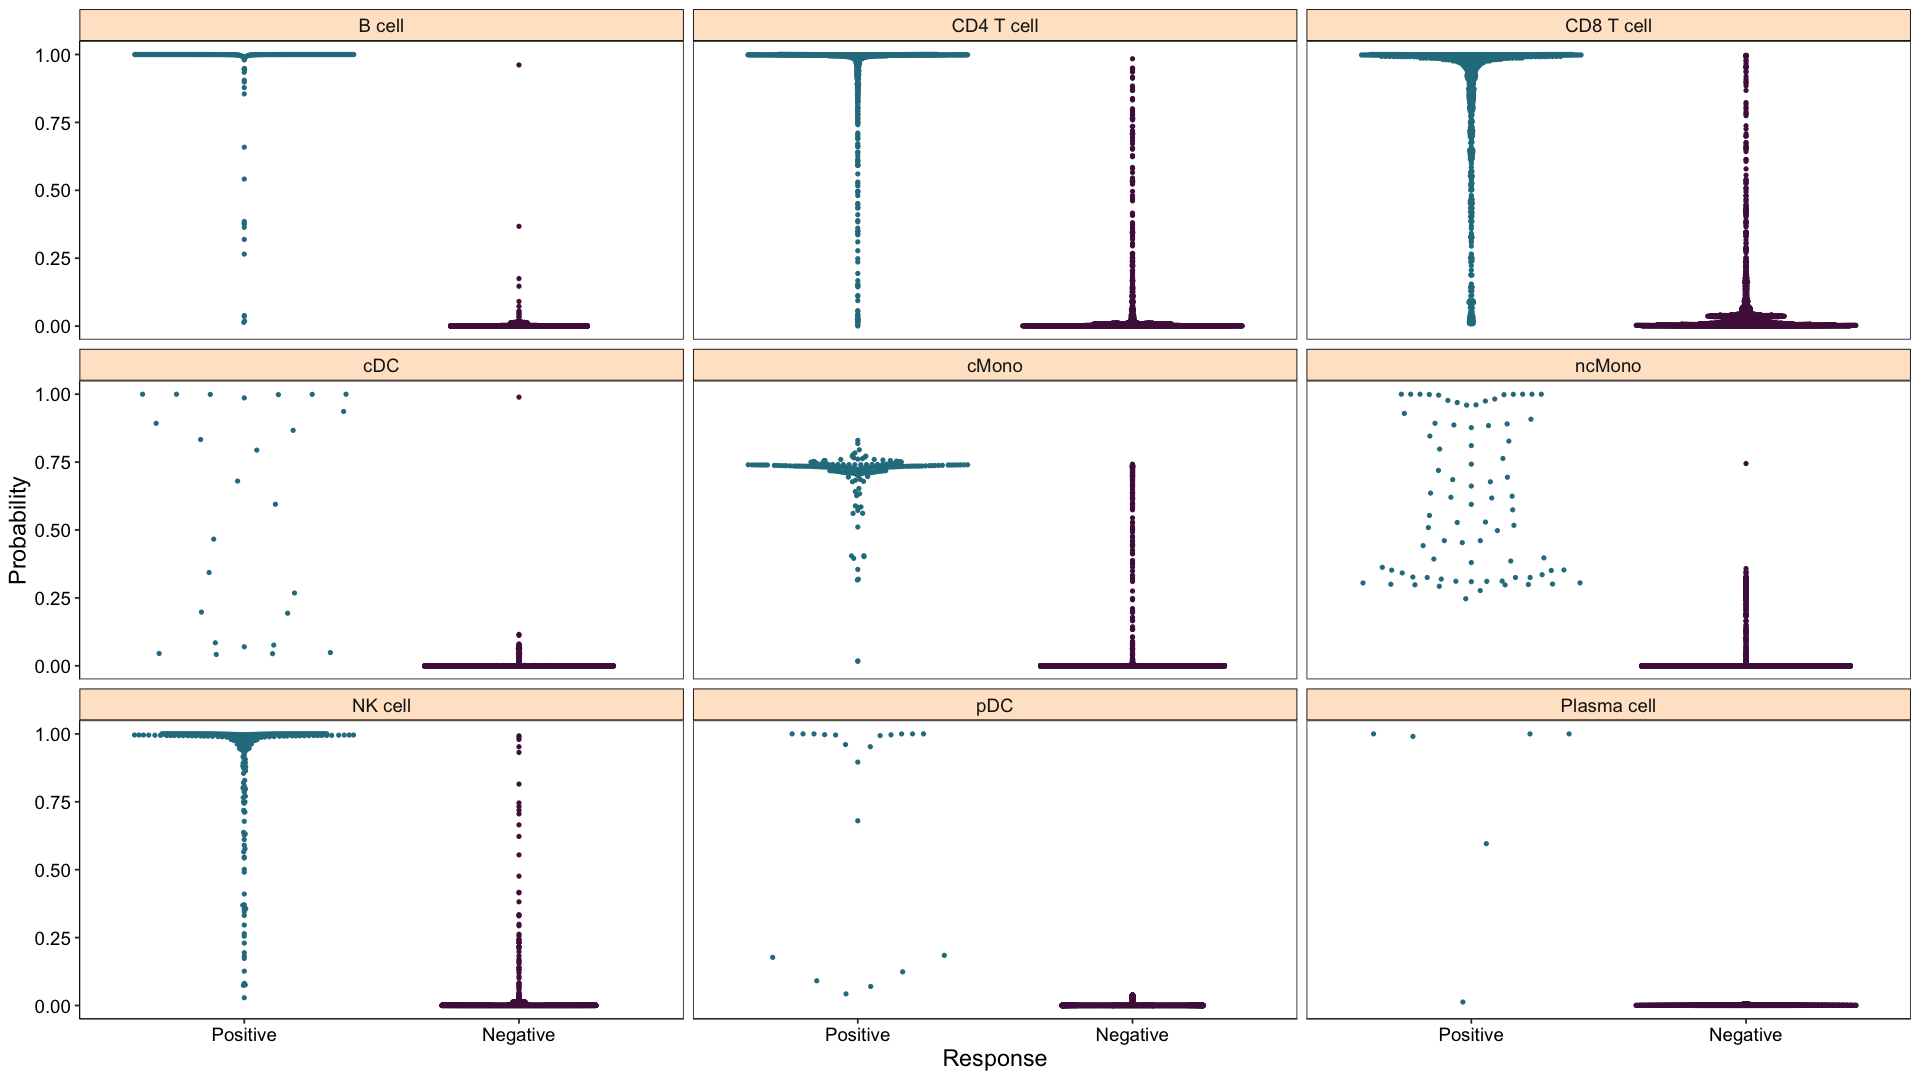

In [13]:
plot_probabilities(reference)

In [15]:
reference <- trainModel(reference, model = "mda", reclassify = c("cMono", "ncMono"))

●  Training models for each cell type...
DONE!


In [16]:
get_scpred(reference)

'scPred' object
✔  Prediction variable = cell_type 
✔  Discriminant features per cell type
✔  Training model(s)
Summary

|Cell type   |    n| Features|Method    |   ROC|  Sens|  Spec|
|:-----------|----:|--------:|:---------|-----:|-----:|-----:|
|B cell      |  280|       50|svmRadial | 1.000| 0.964| 1.000|
|CD4 T cell  | 1620|       50|svmRadial | 0.997| 0.971| 0.975|
|CD8 T cell  |  945|       50|svmRadial | 0.985| 0.902| 0.978|
|cDC         |   26|       50|svmRadial | 0.995| 0.547| 1.000|
|cMono       |  212|       50|mda       | 0.999| 0.990| 0.997|
|ncMono      |   79|       50|mda       | 1.000| 0.949| 0.999|
|NK cell     |  312|       50|svmRadial | 0.999| 0.936| 0.996|
|pDC         |   20|       50|svmRadial | 1.000| 0.700| 1.000|
|Plasma cell |    6|       50|svmRadial | 1.000| 0.800| 1.000|

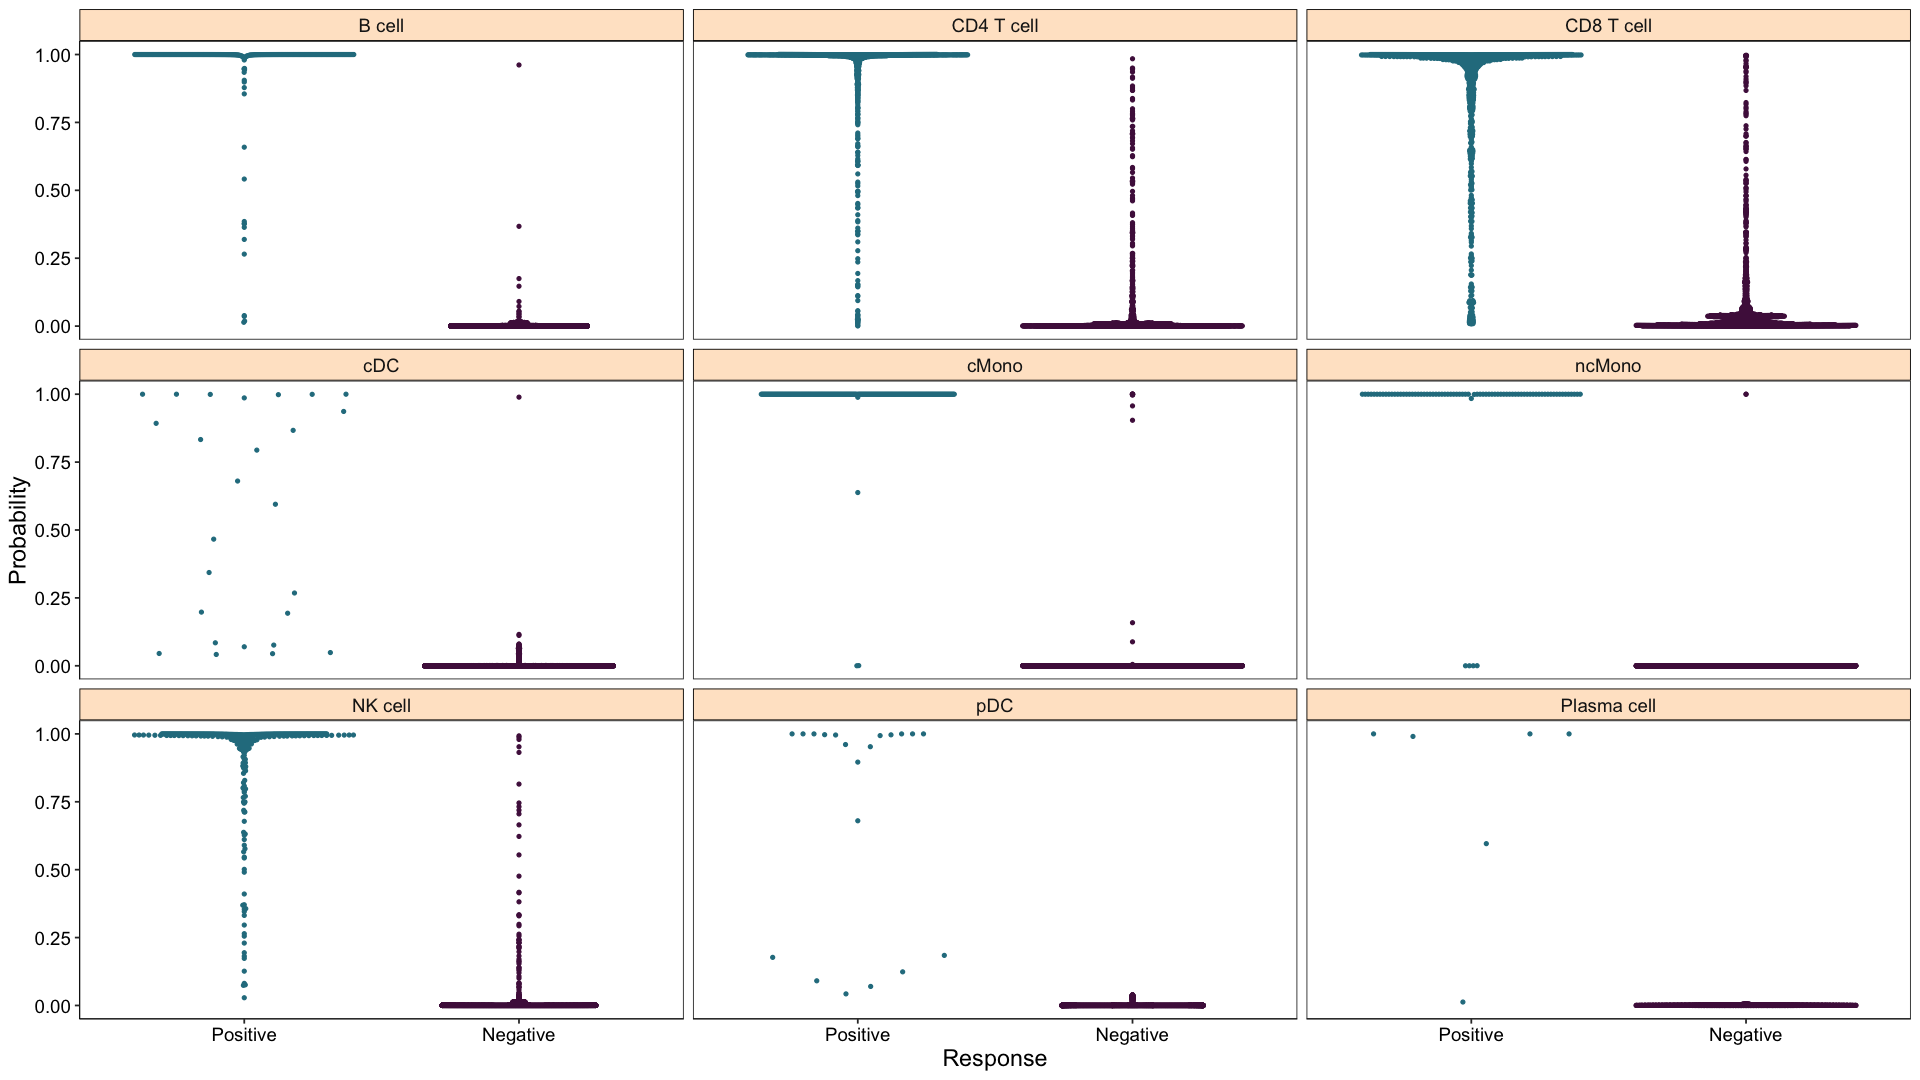

In [17]:
plot_probabilities(reference)

In [18]:
query <- NormalizeData(query)

In [19]:
query <- scPredict(query, reference)

●  Matching reference with new dataset...
	 ─ 2000 features present in reference loadings
	 ─ 2000 features shared between reference and new dataset
	 ─ 100% of features in the reference are present in new dataset
●  Aligning new data to reference...


Harmony 1/20

Harmony 2/20

Harmony 3/20

Harmony 4/20

Harmony 5/20

Harmony 6/20

Harmony 7/20

Harmony 8/20

Harmony 9/20

Harmony 10/20

Harmony converged after 10 iterations



●  Classifying cells...
DONE!


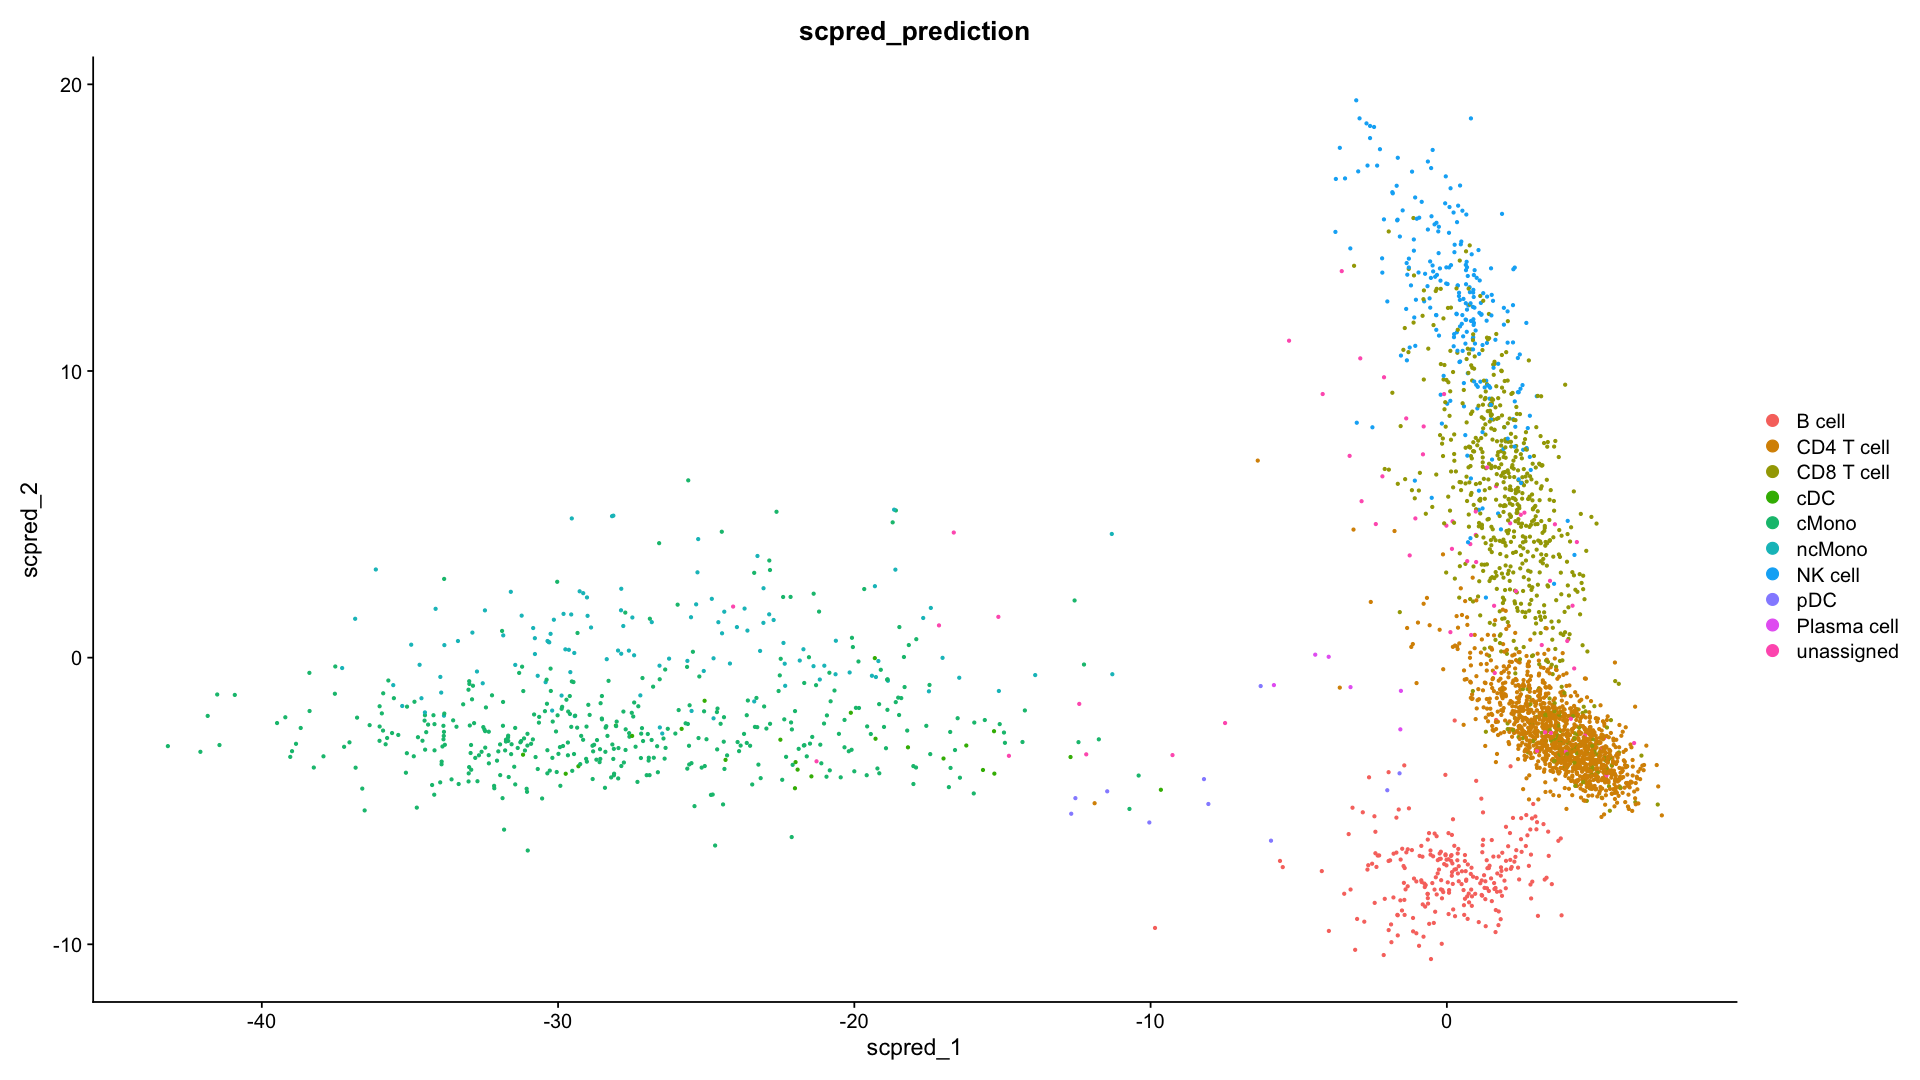

In [21]:
DimPlot(query, group.by = "scpred_prediction", reduction = "scpred")

In [22]:
query <- RunUMAP(query, reduction = "scpred", dims = 1:30)

15:53:07 UMAP embedding parameters a = 0.9922 b = 1.112

15:53:07 Read 3000 rows and found 30 numeric columns

15:53:07 Using Annoy for neighbor search, n_neighbors = 30

15:53:07 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:53:08 Writing NN index file to temp file /var/folders/cq/4gq41jhd0tbcx2l74n_7g0nw0000gn/T//RtmpAldf6y/filef65a6028b157

15:53:08 Searching Annoy index using 1 thread, search_k = 3000

15:53:08 Annoy recall = 100%

15:53:08 Commencing smooth kNN distance calibration using 1 thread

15:53:09 Initializing from normalized Laplacian + noise

15:53:09 Commencing optimization for 500 epochs, with 134488 positive edges

15:53:13 Optimization finished



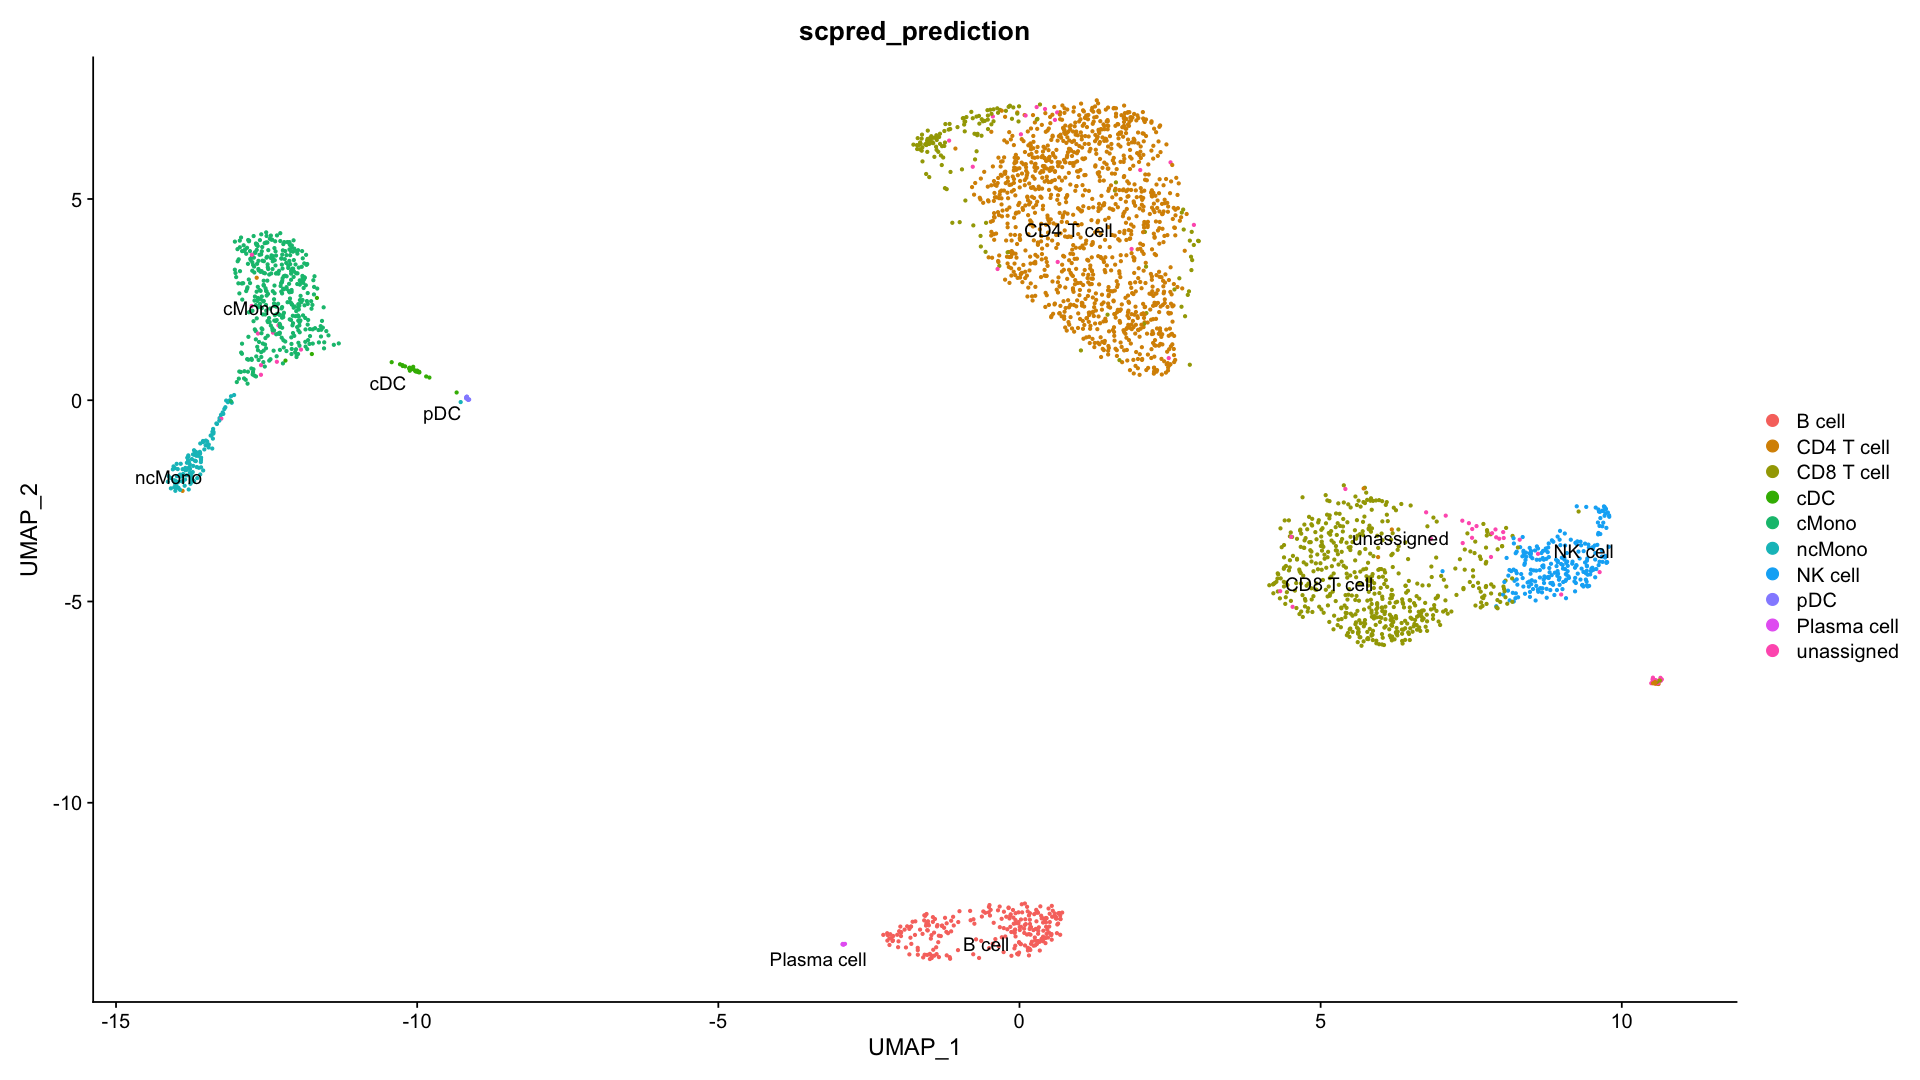

In [23]:
DimPlot(query, group.by = "scpred_prediction", label = TRUE, repel = TRUE)

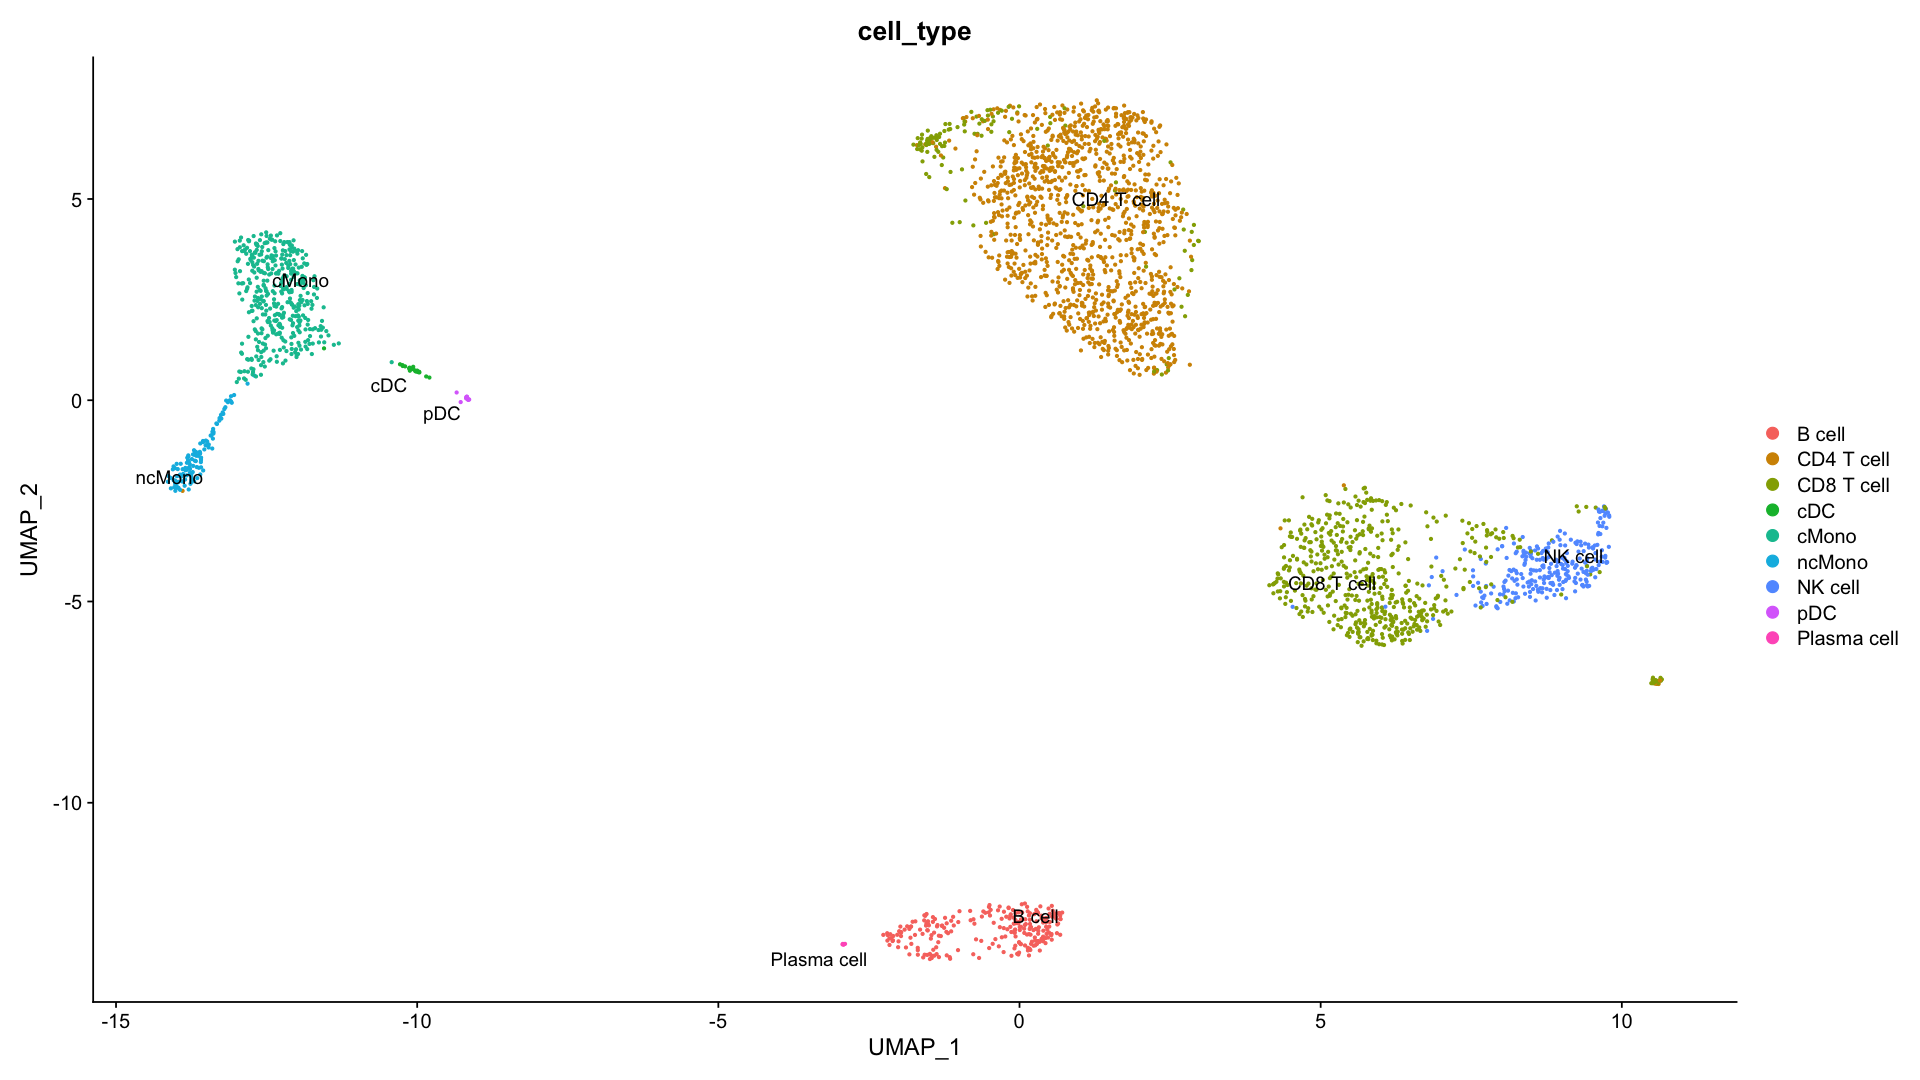

In [24]:
DimPlot(query, group.by = "cell_type", label = TRUE, repel = TRUE)

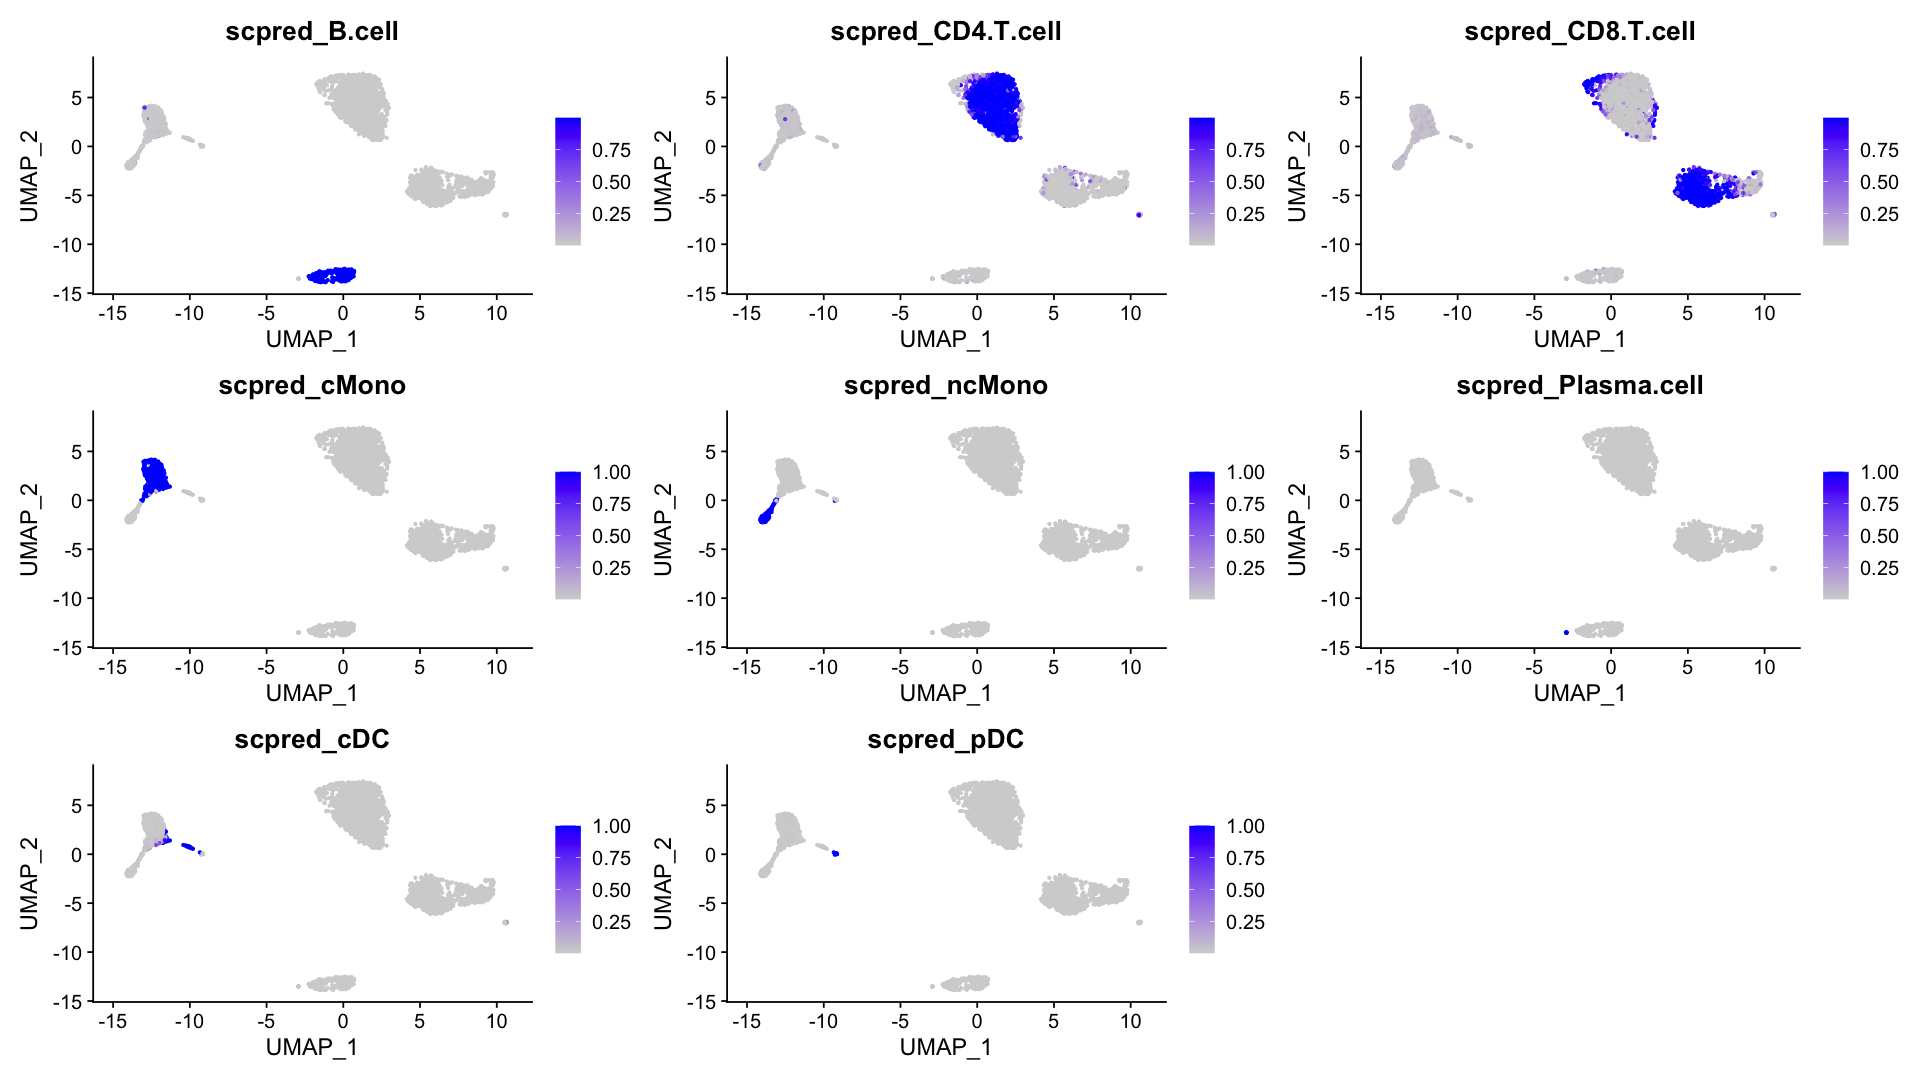

In [25]:
FeaturePlot(query, c("scpred_B.cell", "scpred_CD4.T.cell", "scpred_CD8.T.cell", 
                     "scpred_cMono", "scpred_ncMono", "scpred_Plasma.cell", 
                     "scpred_cDC", "scpred_pDC"))

In [26]:
crossTab(query, "cell_type", "scpred_prediction")

,B cell,CD4 T cell,CD8 T cell,cDC,cMono,ncMono,NK cell,pDC,Plasma cell
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
B cell,250,0,0,0,0,0,0,0,0
CD4 T cell,0,1179,25,0,1,0,0,0,0
CD8 T cell,0,47,602,0,0,0,39,0,0
cDC,0,0,0,19,4,0,0,1,0
cMono,0,0,0,1,395,3,0,0,0
ncMono,0,0,0,0,0,115,0,1,0
NK cell,0,0,11,0,0,0,230,0,0
pDC,0,0,0,0,0,0,0,10,0
Plasma cell,0,0,0,0,0,0,0,0,6


In [31]:
query$scpred_pDC

CCGTACTGTAGCTTGT-1 CCTTCGACATCCAACA-1 GTACTCCTCCCATTAT-1 GGGCATCGTCTTCTCG-1 
         "NK cell"       "CD4 T cell"       "CD4 T cell"           "B cell" 
GACGGCTCAAGCCATT-1 GTGCAGCAGATGTGTA-1 CGCGTTTCAATCCGAT-1 GAATGAAGTCAGTGGA-1 
      "CD8 T cell"       "CD4 T cell"       "CD4 T cell"       "CD8 T cell" 
GGGCACTGTATAATGG-1 AAGGCAGGTCATGCCG-1 TCTCTAAGTAGCGATG-1 TTCGGTCAGAGTAAGG-1 
          "B cell"       "CD4 T cell"          "NK cell"       "CD4 T cell" 
GGTGCGTTCGGATGTT-1 GCAGCCAAGCACAGGT-1 AGAGCTTTCGTTTGCC-1 GTTCGGGTCACTATTC-1 
           "cMono"       "CD8 T cell"       "CD8 T cell"          "NK cell" 
ACTGAACCAAGCCATT-1 ACACTGAAGCACAGGT-1 CTACACCTCCGGGTGT-1 GACCAATCAATAGAGT-1 
      "CD8 T cell"       "CD4 T cell"            "cMono"            "cMono" 
ATCGAGTCATATACGC-1 GGGCACTCAAAGGTGC-1 AACTTTCCATCCCACT-1 GACCAATAGCCCTAAT-1 
      "CD4 T cell"           "B cell"       "CD4 T cell"       "CD4 T cell" 
TACGGTAGTCCCTTGT-1 CGGGTCACACCGGAAA-1 CGGACACCAGCCTTTC-1 GTCGGGTCATGTAGTC-1 
      "CD8 T cell"       "CD4 T cell"       "CD8 T cell"           "B cell" 
ACTGATGAGCCATCGC-1 CCACCTAAGTGCGATG-1 TTTCCTCGTAAACGCG-1 GATCGCGCATGAAGTA-1 
           "cMono"       "CD8 T cell"            "cMono"           "ncMono" 
GCTGCTTCAGCATACT-1 CAACTAGTCACTGGGC-1 AGAATAGTCTGCTTGC-1 ATAGACCTCCTGCAGG-1 
      "CD4 T cell"            "cMono"       "CD8 T cell"       "CD4 T cell" 
TTAGTTCGTAATCGTC-1 TCATTACTCTATCCTA-1 TTAGTTCCACGAAAGC-1 ACTTACTAGATGAGAG-1 
         "NK cell"       "CD4 T cell"          "NK cell"           "B cell" 
TGGCTGGGTTGGACCC-1 GTGAAGGGTATCGCAT-1 AAGCCGCGTCTCCCTA-1 TACGGTAGTCCGACGT-1 
          "B cell"       "CD4 T cell"       "CD8 T cell"           "ncMono" 
AAGGAGCGTGCCTGTG-1 CACCAGGTCTTTACGT-1 TACTCATGTACCCAAT-1 GATGAGGCAAAGCGGT-1 
      "CD4 T cell"          "NK cell"            "cMono"          "NK cell" 
GCATGATCAAGAAAGG-1 GGGTCTGAGTGGGTTG-1 GGGACCTCAAGTTCTG-1 GATCAGTCAATGGAGC-1 
      "CD4 T cell"            "cMono"       "CD4 T cell"       "CD8 T cell" 
TAAGAGATCTAACTTC-1 CAGCGACCAGTACACT-1 CACACTCAGGCAGGTT-1 TGTCCCAGTCCGAATT-1 
          "B cell"       "CD8 T cell"          "NK cell"       "CD4 T cell" 
TAAGAGAAGCCAGTTT-1 CAGGTGCTCCCAACGG-1 GAGGTGACATGACGGA-1 CTCGGGACAGCTTCGG-1 
         "NK cell"            "cMono"            "cMono"           "ncMono" 
AGCATACCACGAAACG-1 TTAACTCTCAAGGTAA-1 CGCGGTATCTTGCCGT-1 GGAGCAACACGCCAGT-1 
      "CD4 T cell"       "CD8 T cell"       "CD4 T cell"           "B cell" 
GCATGCGAGCCAACAG-1 TCAACGACACCCATGG-1 CGCTTCATCGAACGGA-1 GGGCATCGTAGGAGTC-1 
      "CD8 T cell"           "B cell"       "CD4 T cell"              "cDC" 
GCTCCTATCTGCAGTA-1 AGCATACGTTTGTTGG-1 ATTACTCCACCGATAT-1 ACCAGTAAGGTTACCT-1 
          "B cell"            "cMono"       "CD8 T cell"       "CD8 T cell" 
CTTGGCTAGCTGTTCA-1 ACTGAGTCATCCTTGC-1 CTACCCAGTCTTTCAT-1 ATGTGTGCAGCCACCA-1 
      "CD8 T cell"       "CD4 T cell"       "CD4 T cell"       "CD8 T cell" 
GGACATTGTAAGGGCT-1 TAAGTGCAGTCTCGGC-1 GCCAAATGTGGGTATG-1 ATTGGACCATTAGCCA-1 
      "CD8 T cell"       "CD4 T cell"            "cMono"              "cDC" 
GTCATTTTCAACGAAA-1 GCACTCTTCCGATATG-1 CAACTAGCAGCTCCGA-1 GATCTAGCATTGTGCA-1 
      "CD8 T cell"       "CD4 T cell"            "cMono"       "CD4 T cell" 
TGCGTGGTCATCGCTC-1 GGACAGAGTATGAAAC-1 TCAGGATGTACATGTC-1 TGGCGCAAGATCACGG-1 
          "B cell"       "CD4 T cell"       "CD4 T cell"           "B cell" 
ACTATCTAGGTCGGAT-1 ATCGAGTTCCAGTATG-1 CATCCACCATCCCACT-1 TGTTCCGGTACCGGCT-1 
      "CD4 T cell"       "CD8 T cell"       "CD4 T cell"          "NK cell" 
AAAGTAGGTACCGTTA-1 AATCCAGCAGCTGCTG-1 TGCCAAAAGACTGGGT-1 CCCTCCTTCTAACTGG-1 
         "NK cell"           "B cell"          "NK cell"       "CD4 T cell" 
GCGCGATGTAAATACG-1 TGGCCAGAGGCGCTCT-1 TACTCGCTCGCTGATA-1 TATTACCGTTACAGAA-1 
      "CD4 T cell"            "cMono"       "CD8 T cell"       "CD4 T cell" 
GATCAGTGTTCAGGCC-1 CTGCGGAAGGCCGAAT-1 AGGCCACTCCGAGCCA-1 GGGATGAAGCCTTGAT-1 
           "cMono"       "CD4 T cell"       "CD8 T cell"            "cMon